Employee Analysis in Northwind Database:
• In this study, we will show how we can better understand employees' characteristics and business processes by examining the employees table.
• Analysis Goals:
• Analyzing general information of employees.
• Evaluating employees' roles and departments.
• Gain insights into performance and organizational structure.tmek.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.io.sql as sqlio
import psycopg2 as ps
import warnings

In [8]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [9]:
import psycopg2 as ps

In [10]:
conn = ps.connect(dbname="postgres",
                  user="postgres",
                  password="admin",
                  port = "5432")

In [12]:
sql = """SELECT 

    e.First_Name || ' ' || e.Last_Name AS AdSoyad,
	e.title as Ünvan,
	case when title_of_courtesy='Ms.' then 'Kadın'
	when title_of_courtesy='Mrs.' then 'Kadın' 
	when title_of_courtesy='Mr.' then 'Erkek'
	when title_of_courtesy='Dr.' then 'Erkek' else '' end as Cinsiyet,
	
 EXTRACT(YEAR FROM AGE('1998-05-06'::date, birth_date))  as Yas,
 EXTRACT(YEAR FROM AGE('1998-05-06'::date, hire_date))  as Deneyim ,
	country as Ulke,
	
    COUNT(distinct o.Order_ID) AS ToplamSipSay,
sum(ROUND((od.unit_price*od.quantity*(1-(od.discount)))::numeric,2)) AS ToplamNetSatıs,
sum(discount) as Indırım
FROM 
    Orders o
	inner JOIN 
    Order_Details od ON o.Order_ID = od.Order_ID
inner JOIN 
    Employees e ON o.Employee_ID = e.Employee_ID
group by e.First_Name || ' ' || e.Last_Name,e.title,title_of_courtesy
, EXTRACT(YEAR FROM AGE('1998-05-06'::date, birth_date)),
 EXTRACT(YEAR FROM AGE('1998-05-06'::date, hire_date)),
 country
ORDER BY 
    ToplamNetSatıs DESC"""

In [13]:
df = sqlio.read_sql_query(sql,conn)
df.head(10)

C:\Users\SibelA\AppData\Local\Temp\ipykernel_24720\1581964848.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql,conn)


,adsoyad,Ünvan,cinsiyet,yas,deneyim,ulke,toplamsipsay,toplamnetsatıs,indırım
0,Margaret Peacock,Sales Representative,Kadın,60.0,5.0,USA,156,232890.83,25.750000
1,Janet Leverling,Sales Representative,Kadın,34.0,6.0,USA,127,202812.83,15.949996
2,Nancy Davolio,Sales Representative,Kadın,49.0,6.0,USA,123,192107.57,16.990002
3,Andrew Fuller,"Vice President, Sales",Erkek,46.0,5.0,USA,96,166537.76,10.549998
4,Laura Callahan,Inside Sales Coordinator,Kadın,40.0,4.0,USA,104,126862.28,14.600000
5,Robert King,Sales Representative,Erkek,37.0,4.0,UK,72,124568.24,12.949998
6,Anne Dodsworth,Sales Representative,Kadın,32.0,3.0,UK,43,77308.05,7.300001
7,Michael Suyama,Sales Representative,Erkek,34.0,4.0,UK,67,73913.13,9.150000
8,Steven Buchanan,Sales Manager,Erkek,43.0,4.0,UK,42,68792.26,7.800000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adsoyad         9 non-null      object 
 1   Ünvan           9 non-null      object 
 2   cinsiyet        9 non-null      object 
 3   yas             9 non-null      float64
 4   deneyim         9 non-null      float64
 5   ulke            9 non-null      object 
 6   toplamsipsay    9 non-null      int64  
 7   toplamnetsatıs  9 non-null      float64
 8   indırım         9 non-null      float64
dtypes: float64(4), int64(1), object(4)
memory usage: 780.0+ bytes


In [19]:
df['yas'] = df['yas'].astype(int)

In [21]:
df['deneyim'] = df['deneyim'].astype(int)

In [23]:
df['toplamnetsatıs'] = df['toplamnetsatıs'].astype(int)

In [25]:
df['indırım'] = df['indırım'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   adsoyad         9 non-null      object
 1   Ünvan           9 non-null      object
 2   cinsiyet        9 non-null      object
 3   yas             9 non-null      int32 
 4   deneyim         9 non-null      int32 
 5   ulke            9 non-null      object
 6   toplamsipsay    9 non-null      int64 
 7   toplamnetsatıs  9 non-null      int32 
 8   indırım         9 non-null      int32 
dtypes: int32(4), int64(1), object(4)
memory usage: 636.0+ bytes


In [29]:
df.head(10)

,adsoyad,Ünvan,cinsiyet,yas,deneyim,ulke,toplamsipsay,toplamnetsatıs,indırım
0,Margaret Peacock,Sales Representative,Kadın,60,5,USA,156,232890,25
1,Janet Leverling,Sales Representative,Kadın,34,6,USA,127,202812,15
2,Nancy Davolio,Sales Representative,Kadın,49,6,USA,123,192107,16
3,Andrew Fuller,"Vice President, Sales",Erkek,46,5,USA,96,166537,10
4,Laura Callahan,Inside Sales Coordinator,Kadın,40,4,USA,104,126862,14
5,Robert King,Sales Representative,Erkek,37,4,UK,72,124568,12
6,Anne Dodsworth,Sales Representative,Kadın,32,3,UK,43,77308,7
7,Michael Suyama,Sales Representative,Erkek,34,4,UK,67,73913,9
8,Steven Buchanan,Sales Manager,Erkek,43,4,UK,42,68792,7


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yas,9.0,41.666667,8.986100,32.0,34.0,40.0,46.0,60.0
deneyim,9.0,4.555556,1.013794,3.0,4.0,4.0,5.0,6.0
toplamsipsay,9.0,92.222222,39.318500,42.0,67.0,96.0,123.0,156.0
toplamnetsatıs,9.0,140643.222222,61000.654723,68792.0,77308.0,126862.0,192107.0,232890.0
indırım,9.0,12.777778,5.651942,7.0,9.0,12.0,15.0,25.0


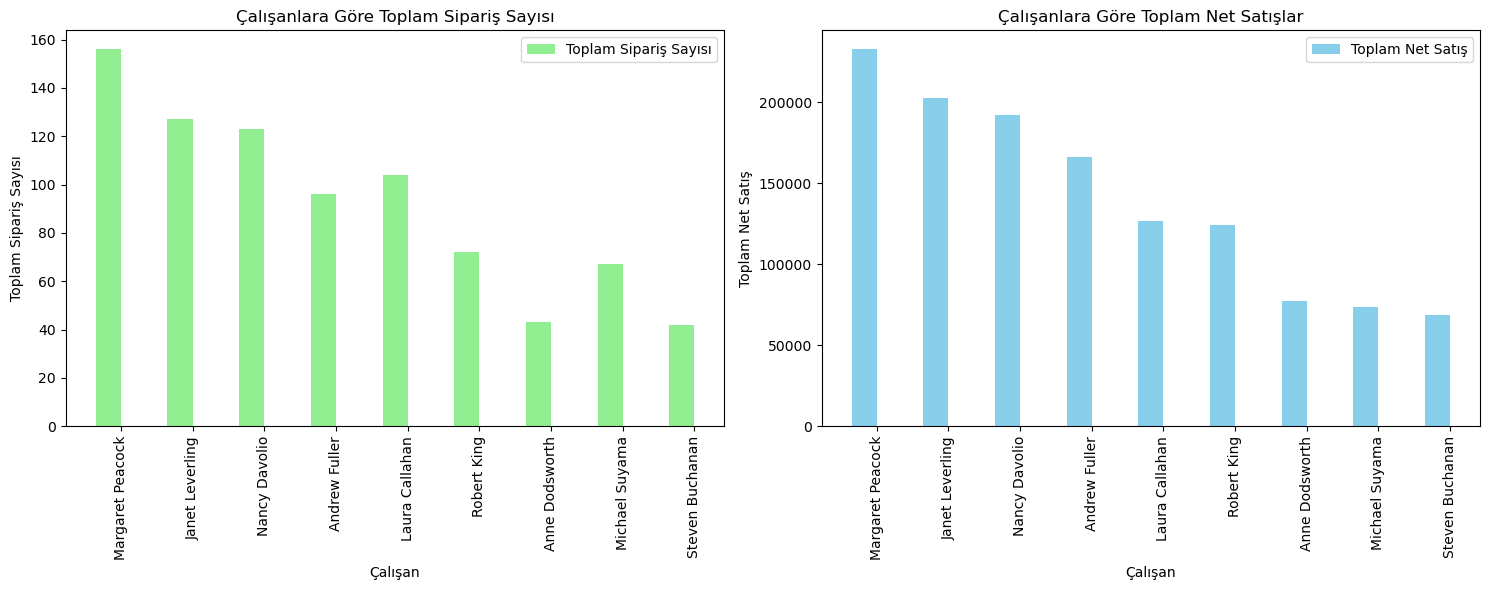

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Örnek veri
labels = df['adsoyad']
total_orders = df['toplamsipsay']
total_sales = df['toplamnetsatıs']

x = np.arange(len(labels))  # Etiketlerin konumları
width = 0.35  # Bar genişliği

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # İki eksenli grafik oluşturma

# İlk bar grafiği: Toplam Sipariş Sayısı
ax1.bar(x - width/2, total_orders, width, label='Toplam Sipariş Sayısı', color='lightgreen')
ax1.set_xlabel('Çalışan')
ax1.set_ylabel('Toplam Sipariş Sayısı')
ax1.set_title('Çalışanlara Göre Toplam Sipariş Sayısı')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=90)
ax1.legend()

# İkinci bar grafiği: Toplam Net Satış
ax2.bar(x - width/2, total_sales, width, label='Toplam Net Satış', color='skyblue')
ax2.set_xlabel('Çalışan')
ax2.set_ylabel('Toplam Net Satış')
ax2.set_title('Çalışanlara Göre Toplam Net Satışlar')
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=90)
ax2.legend()

# Grafik düzenlemeleri
plt.tight_layout()
plt.show()


In [35]:

#When we look at the Total Number of Orders and Net Sales by Employees, we see that Margaret has the best performance.
#The employee with the lowest performance is Mother.

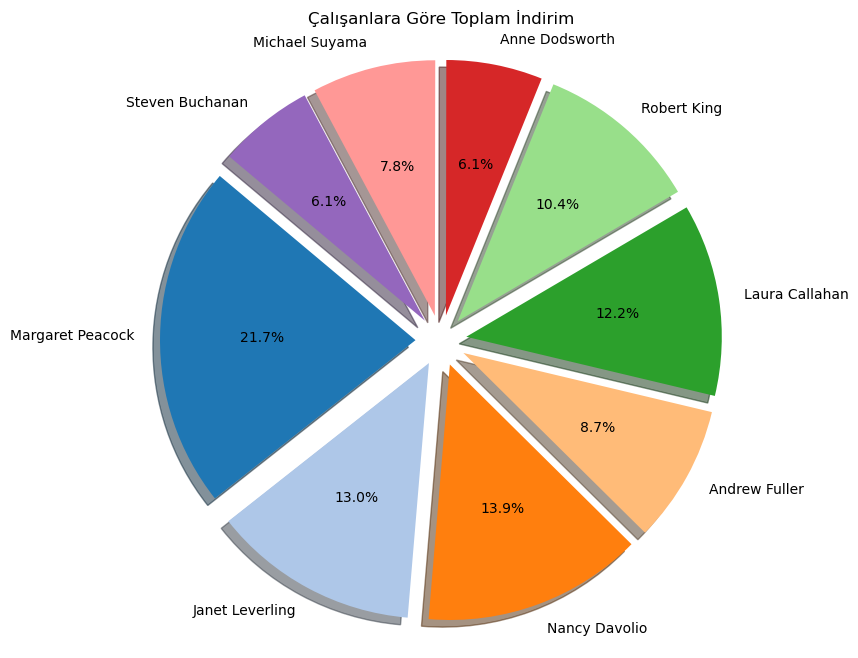

In [37]:

labels = df['adsoyad']
sizes = df['indırım']
colors = plt.get_cmap('tab20').colors  # Renk paleti
explode = [0.1] * len(labels)  # Her dilimi hafifçe patlat


plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis('equal')
plt.title('Çalışanlara Göre Toplam İndirim')
plt.show()

When we examine our #Total Discount by Employees chart, we see that Margaret has the highest rate.
#The reason for this is due to the high number of sales and sales amounts.
#As we can guess, the lowest discount rate belongs to the seller Anne.

In [170]:
df.head(10)

,adsoyad,Ünvan,cinsiyet,yas,deneyim,ulke,toplamsipsay,toplamnetsatıs,indırım
0,Margaret Peacock,Sales Representative,Kadın,60,5,USA,156,232890,25
1,Janet Leverling,Sales Representative,Kadın,34,6,USA,127,202812,15
2,Nancy Davolio,Sales Representative,Kadın,49,6,USA,123,192107,16
3,Andrew Fuller,"Vice President, Sales",Erkek,46,5,USA,96,166537,10
4,Laura Callahan,Inside Sales Coordinator,Kadın,40,4,USA,104,126862,14
5,Robert King,Sales Representative,Erkek,37,4,UK,72,124568,12
6,Anne Dodsworth,Sales Representative,Kadın,32,3,UK,43,77308,7
7,Michael Suyama,Sales Representative,Erkek,34,4,UK,67,73913,9
8,Steven Buchanan,Sales Manager,Erkek,43,4,UK,42,68792,7


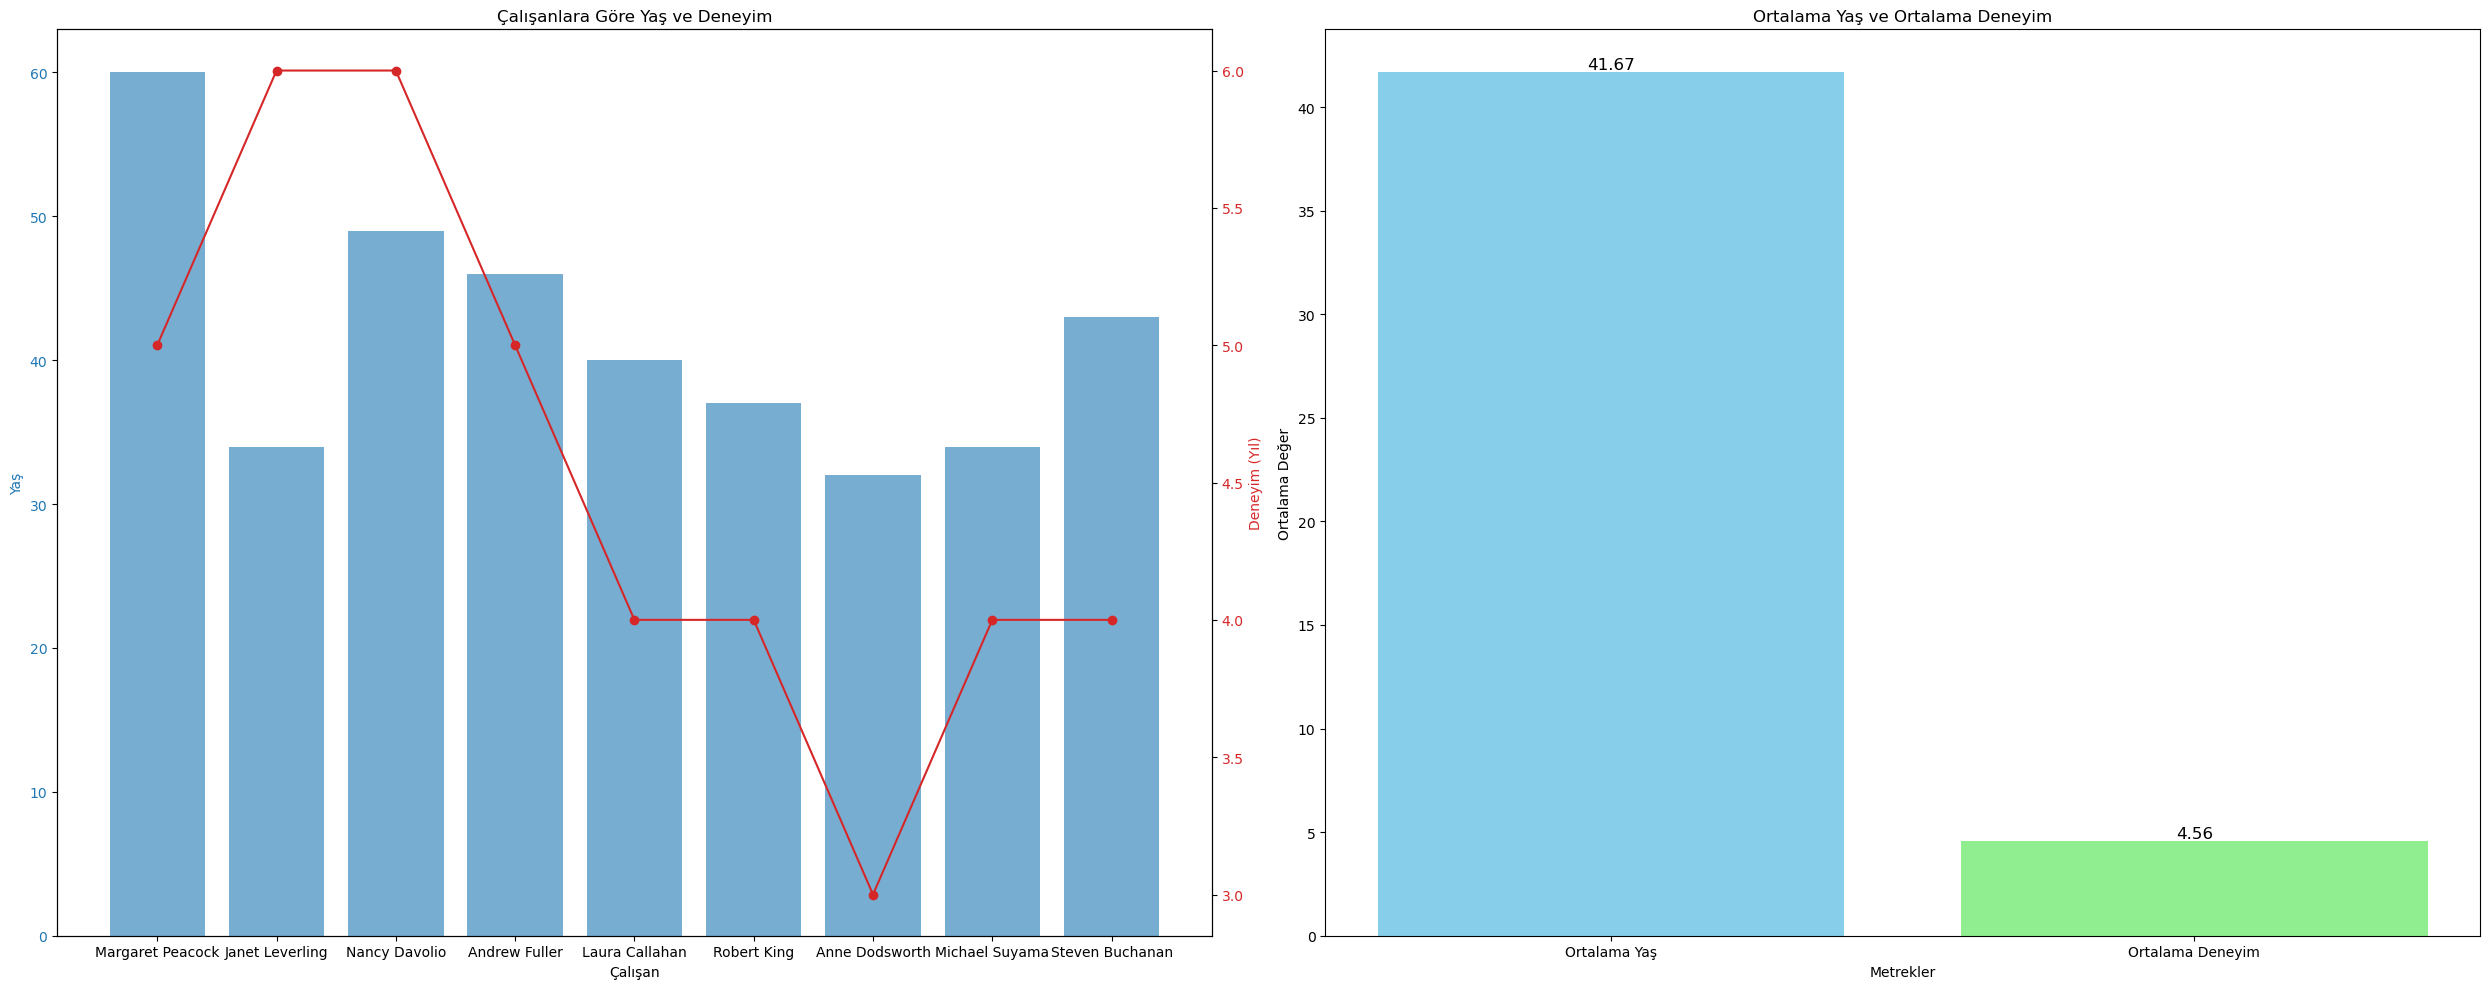

In [178]:
ortalama_yas = df['yas'].mean()
ortalama_deneyim = df['deneyim'].mean()

# Grafik oluşturma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))  # 1 satır, 2 sütunlu subplot

# Çalışanlara göre yaş ve deneyim grafiği
color = 'tab:blue'
ax1.set_xlabel('Çalışan')
ax1.set_ylabel('Yaş', color=color)
ax1.bar(df['adsoyad'], df['yas'], color=color, alpha=0.6, label='Yaş')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Çalışanlara Göre Yaş ve Deneyim')

ax2_twin = ax1.twinx()  
color = 'tab:red'
ax2_twin.set_ylabel('Deneyim (Yıl)', color=color)  
ax2_twin.plot(df['adsoyad'], df['deneyim'], color=color, marker='o', label='Deneyim (Yıl)')
ax2_twin.tick_params(axis='y', labelcolor=color)

# Ortalama yaş ve deneyim grafiği
metrics = ['Ortalama Yaş', 'Ortalama Deneyim']
values = [ortalama_yas, ortalama_deneyim]

bars = ax2.bar(metrics, values, color=['skyblue', 'lightgreen'])

# Veri değerlerini ekleme
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12, color='black')

ax2.set_xlabel('Metrekler')
ax2.set_ylabel('Ortalama Değer')
ax2.set_title('Ortalama Yaş ve Ortalama Deneyim')

# Grafiklerin sıkıştırılmasını önlemek için layout
fig.tight_layout()

# Grafikleri göster
plt.show()


#In this analysis, we will examine the ages and experiences of the employees.
#We see that the average age is 41 and the years of experience are 4 years.
#Our favorite salesperson, Margaret, is 60 years old and has 5 years of experience in the company, but she is still short of making the most sales. 
We think it is the experience of #pastyears. The company actually works with people whose average age is higher and more experienced.
It will be positive in terms of #sales performance.

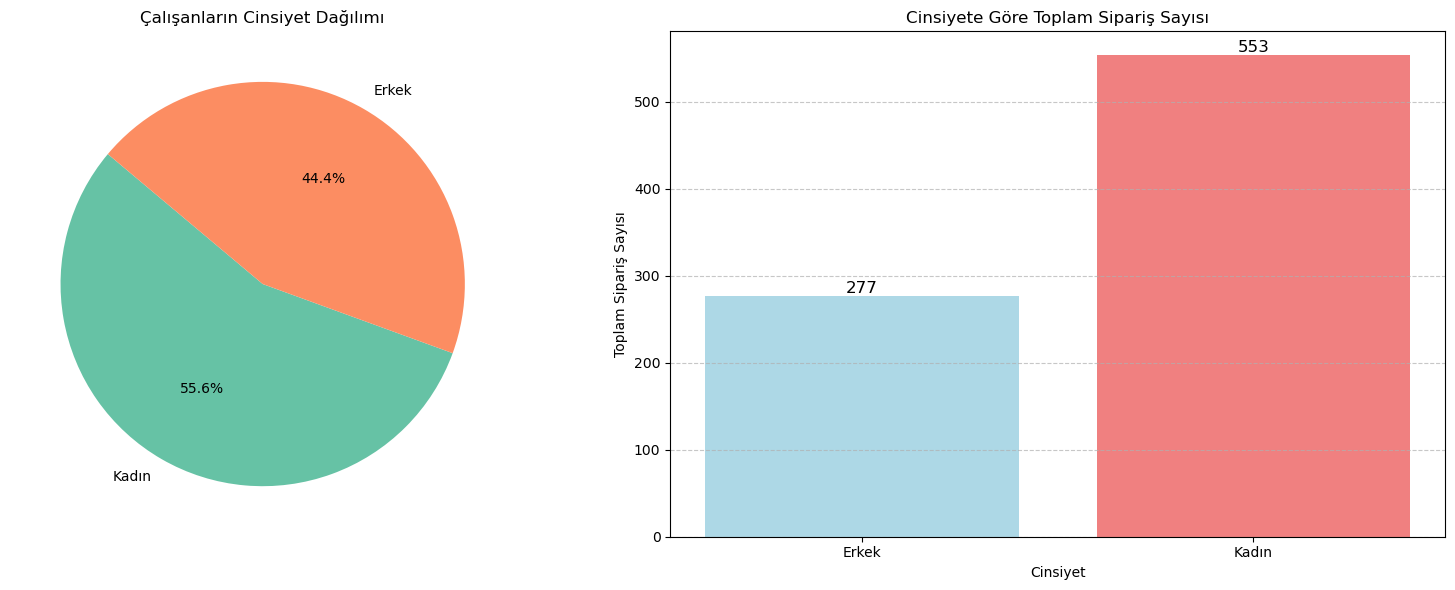

In [173]:

# Cinsiyetlere göre çalışan sayısını hesaplama
cinsiyet_sayilari = df['cinsiyet'].value_counts()

# Cinsiyete göre toplam sipariş sayısını hesaplama
cinsiyet_gruplama = df.groupby('cinsiyet')['toplamsipsay'].sum().reset_index()

# Grafik oluşturma
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 satır, 2 sütunlu bir subplot oluşturma

# Pasta grafiği
axes[0].pie(cinsiyet_sayilari, labels=cinsiyet_sayilari.index, autopct='%1.1f%%', colors=plt.get_cmap('Set2').colors, startangle=140)
axes[0].set_title('Çalışanların Cinsiyet Dağılımı')

# Çubuk grafiği
bars = axes[1].bar(cinsiyet_gruplama['cinsiyet'], cinsiyet_gruplama['toplamsipsay'], color=['lightblue', 'lightcoral'])

# Veri değerlerini ekleme
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12, color='black')

axes[1].set_xlabel('Cinsiyet')
axes[1].set_ylabel('Toplam Sipariş Sayısı')
axes[1].set_title('Cinsiyete Göre Toplam Sipariş Sayısı')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Grafiklerin sıkıştırılmasını önlemek için layout
plt.tight_layout()

# Grafikleri göster
plt.show()

# 5 kadın 4 erkek


#In this analysis, we will examine the Gender of Employees.
#5 of the employees are women and 4 are men. And when we examine our graphs as men and women, female employees 
We observe that #sales contribution is higher. New personnel should be female and have a higher average age.


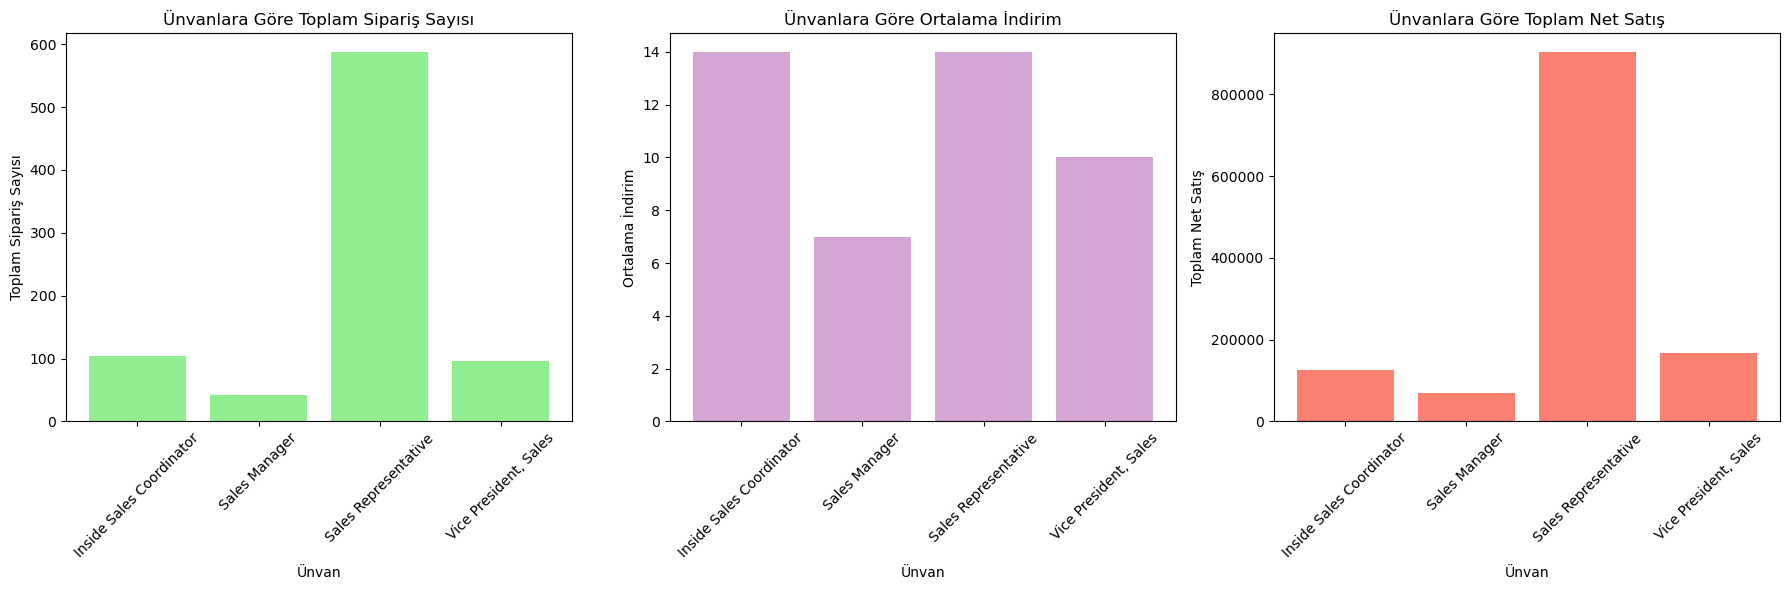

In [179]:
title_summary = df.groupby('Ünvan').agg({
    'toplamsipsay': 'sum',
    'toplamnetsatıs': 'sum',
    'indırım': 'mean'
}).reset_index()

# Grafik oluşturma
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 satır, 3 sütunlu subplot

# Ünvanlara Göre Toplam Sipariş Sayısı
axs[0].bar(title_summary['Ünvan'], title_summary['toplamsipsay'], color='lightgreen')
axs[0].set_xlabel('Ünvan')
axs[0].set_ylabel('Toplam Sipariş Sayısı')
axs[0].set_title('Ünvanlara Göre Toplam Sipariş Sayısı')
axs[0].tick_params(axis='x', rotation=45)

# Ünvanlara Göre Ortalama İndirim
axs[1].bar(title_summary['Ünvan'], title_summary['indırım'], color='#D3A6D3')  # light purple color in hex
axs[1].set_xlabel('Ünvan')
axs[1].set_ylabel('Ortalama İndirim')
axs[1].set_title('Ünvanlara Göre Ortalama İndirim')
axs[1].tick_params(axis='x', rotation=45)

# Ünvanlara Göre Toplam Net Satış
axs[2].bar(title_summary['Ünvan'], title_summary['toplamnetsatıs'], color='salmon')
axs[2].set_xlabel('Ünvan')
axs[2].set_ylabel('Toplam Net Satış')
axs[2].set_title('Ünvanlara Göre Toplam Net Satış')
axs[2].tick_params(axis='x', rotation=45)

# Grafik düzenlemeleri
plt.tight_layout()
plt.show()


#In this analysis, we will measure sales performances according to employee titles.
#The highest sales figures belong to sales representatives. 
When we examine the #discount rates, we see that the rates of Direkto and sales representatives are the same.
#Customer Representative worked effectively with high number of orders and net sales and a discount rate of 14%, 
#shows that he is successful in increasing sales volume. The discount rate is the customer representative's ability to attract customers and 
He played an important role in the strategy of making #high volume sales.

#Director may have made a lower net sales with fewer orders by using the 14% discount rate.
#This may indicate that the director may have used discounts on deals with larger and strategic clients, or
#indicates that you may have preferred to make fewer but higher value deals.

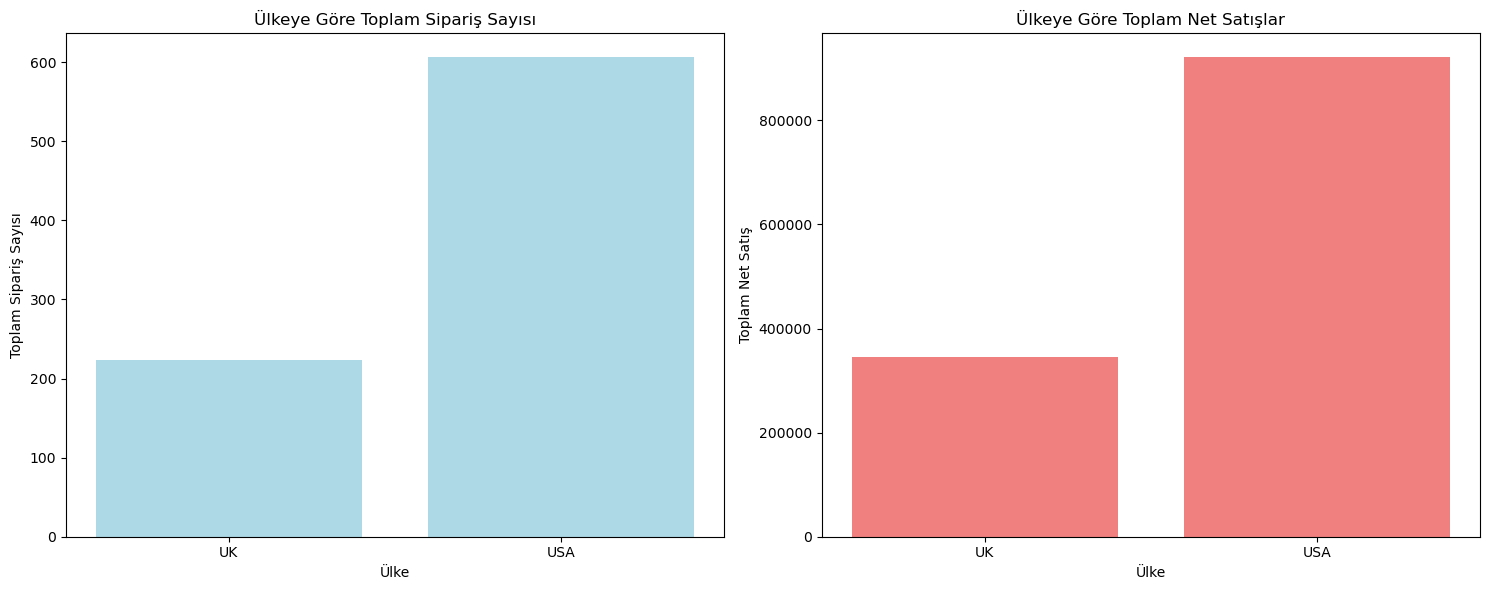

In [73]:
# Ülkeye göre toplam sipariş sayısı ve toplam net satış
country_summary = df.groupby('ulke').agg({
    'toplamsipsay': 'sum',
    'toplamnetsatıs': 'sum',
    'indırım': 'sum'
}).reset_index()

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Ülkeye Göre Toplam Sipariş Sayısı
axs[0].bar(country_summary['ulke'], country_summary['toplamsipsay'], color='lightblue')
axs[0].set_xlabel('Ülke')
axs[0].set_ylabel('Toplam Sipariş Sayısı')
axs[0].set_title('Ülkeye Göre Toplam Sipariş Sayısı')

# Ülkeye Göre Toplam Net Satışlar
axs[1].bar(country_summary['ulke'], country_summary['toplamnetsatıs'], color='lightcoral')
axs[1].set_xlabel('Ülke')
axs[1].set_ylabel('Toplam Net Satış')
axs[1].set_title('Ülkeye Göre Toplam Net Satışlar')

# Grafik düzenlemeleri
plt.tight_layout()
plt.show()


In [ ]:
#We see the Sales Numbers and Net Sales amounts according to the Countries of the Employees

#Case 2 Logistics performance
My purpose in this analysis is to evaluate Logistics performance. Comparing performances and providing improvement suggestions.

In [74]:
sql2="""SELECT 
    o.Order_ID,
    Order_Date,
    Required_Date,
    Shipped_Date,
	--d.quantity,
	--p.product_name,
	o.ship_country as TeslimatUlkesi,
	--c.category_name,
	--p.unit_in_stock,
	--p.reorder_level,
	case when (Shipped_Date - Order_Date:: date)<(Required_Date - Order_Date :: date) then 'Vaktinde Teslimat'
	when (Shipped_Date - Order_Date:: date)>(Required_Date - Order_Date :: date) then 'Geçikmiş Teslimat' 
	when Shipped_Date IS NULL then 'Teslim Edilmeyen' else 'Vaktinde Teslimat' end as TeslimatTipi,
	(Shipped_Date - Order_Date:: date) as TeslimatSüresi,
    (Required_Date - Order_Date :: date) AS TeslimatTarihineKalanGunSayisi,
 case when  (Required_Date-Shipped_Date:: date)>0 then '0' else  (Required_Date-Shipped_Date:: date)*-1 end AS GecikmeSüresi,
  s.company_name as Dagıtım_Sirketi,
  o.freight as DagıtımÜcreti
  
FROM 
    Orders o 

	inner join shippers s on o.ship_via=s.shipper_id





"""

In [76]:
df2 = sqlio.read_sql_query(sql2,conn)
df2.head()

C:\Users\SibelA\AppData\Local\Temp\ipykernel_24720\229322232.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = sqlio.read_sql_query(sql2,conn)


,order_id,order_date,required_date,shipped_date,teslimatulkesi,teslimattipi,teslimatsüresi,teslimattarihinekalangunsayisi,gecikmesüresi,dagıtım_sirketi,dagıtımÜcreti
0,10248,1996-07-04,1996-08-01,1996-07-16,France,Vaktinde Teslimat,12.0,28,0.0,Federal Shipping,32.38
1,10249,1996-07-05,1996-08-16,1996-07-10,Germany,Vaktinde Teslimat,5.0,42,0.0,Speedy Express,11.61
2,10250,1996-07-08,1996-08-05,1996-07-12,Brazil,Vaktinde Teslimat,4.0,28,0.0,United Package,65.83
3,10251,1996-07-08,1996-08-05,1996-07-15,France,Vaktinde Teslimat,7.0,28,0.0,Speedy Express,41.34
4,10252,1996-07-09,1996-08-06,1996-07-11,Belgium,Vaktinde Teslimat,2.0,28,0.0,United Package,51.30


In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   order_id                        830 non-null    int64  
 1   order_date                      830 non-null    object 
 2   required_date                   830 non-null    object 
 3   shipped_date                    809 non-null    object 
 4   teslimatulkesi                  830 non-null    object 
 5   teslimattipi                    830 non-null    object 
 6   teslimatsüresi                  809 non-null    float64
 7   teslimattarihinekalangunsayisi  830 non-null    int64  
 8   gecikmesüresi                   809 non-null    float64
 9   dagıtım_sirketi                 830 non-null    object 
 10  dagıtımÜcreti                   830 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 71.5+ KB


In [80]:
df2.head()

,order_id,order_date,required_date,shipped_date,teslimatulkesi,teslimattipi,teslimatsüresi,teslimattarihinekalangunsayisi,gecikmesüresi,dagıtım_sirketi,dagıtımÜcreti
0,10248,1996-07-04,1996-08-01,1996-07-16,France,Vaktinde Teslimat,12.0,28,0.0,Federal Shipping,32.38
1,10249,1996-07-05,1996-08-16,1996-07-10,Germany,Vaktinde Teslimat,5.0,42,0.0,Speedy Express,11.61
2,10250,1996-07-08,1996-08-05,1996-07-12,Brazil,Vaktinde Teslimat,4.0,28,0.0,United Package,65.83
3,10251,1996-07-08,1996-08-05,1996-07-15,France,Vaktinde Teslimat,7.0,28,0.0,Speedy Express,41.34
4,10252,1996-07-09,1996-08-06,1996-07-11,Belgium,Vaktinde Teslimat,2.0,28,0.0,United Package,51.30


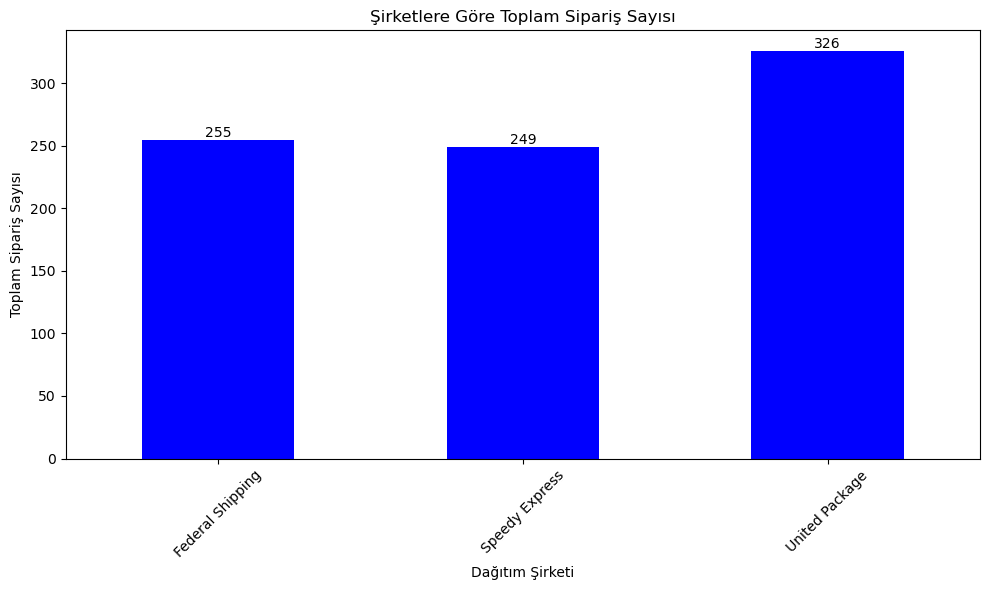

In [82]:
#Toplam Sipariş Sayısı
plt.figure(figsize=(10, 6))
ax = df2.groupby('dagıtım_sirketi')['order_id'].count().plot(kind='bar', color='blue')

# Başlık ve etiketler
plt.title('Şirketlere Göre Toplam Sipariş Sayısı')
plt.xlabel('Dağıtım Şirketi')
plt.ylabel('Toplam Sipariş Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()

# Etiketleri ekleme
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Grafiği göster
plt.show()

We see the total number of orders carried by #cargo companies.
#The company that carries the most orders is United Package
#Afterwards Federal Shipping and Speedy Express

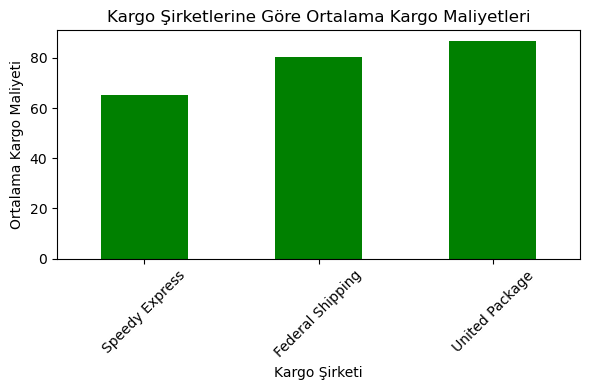

In [49]:
average_freight = df2.groupby('dagıtım_sirketi')['dagıtımÜcreti'].mean()

# Grafik oluşturma
plt.figure(figsize=(6, 4))
average_freight.sort_values().plot(kind='bar', color='green')
plt.title('Kargo Şirketlerine Göre Ortalama Kargo Maliyetleri')
plt.xlabel('Kargo Şirketi')
plt.ylabel('Ortalama Kargo Maliyeti')
plt.xticks(rotation=45)
plt.tight_layout()

# Grafiği göster
plt.show()

#United Package has the highest average shipping cost, which is directly proportional to the number of orders they carry. 
Speedy Express provides the most convenient transportation 
On average, we see the shipping cost at Federal Shipping.

In [51]:
df2.head()

,order_id,order_date,required_date,shipped_date,teslimatulkesi,teslimattipi,teslimatsüresi,teslimattarihinekalangunsayisi,gecikmesüresi,dagıtım_sirketi,dagıtımÜcreti
0,10248,1996-07-04,1996-08-01,1996-07-16,France,Vaktinde Teslimat,12.0,28,0.0,Federal Shipping,32.38
1,10249,1996-07-05,1996-08-16,1996-07-10,Germany,Vaktinde Teslimat,5.0,42,0.0,Speedy Express,11.61
2,10250,1996-07-08,1996-08-05,1996-07-12,Brazil,Vaktinde Teslimat,4.0,28,0.0,United Package,65.83
3,10251,1996-07-08,1996-08-05,1996-07-15,France,Vaktinde Teslimat,7.0,28,0.0,Speedy Express,41.34
4,10252,1996-07-09,1996-08-06,1996-07-11,Belgium,Vaktinde Teslimat,2.0,28,0.0,United Package,51.30


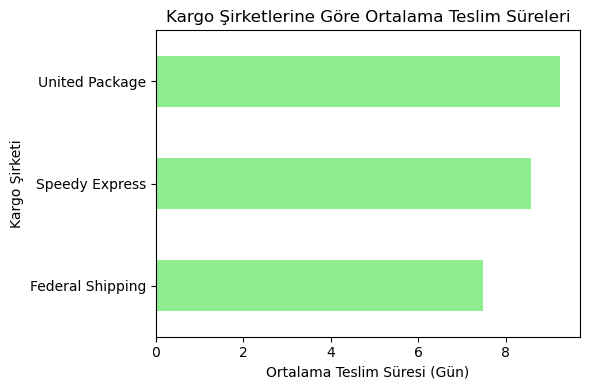

In [53]:
average_delivery_time = df2.groupby('dagıtım_sirketi')['teslimatsüresi'].mean()

# Yatay çubuk grafik oluşturma
plt.figure(figsize=(6, 4))
average_delivery_time.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Kargo Şirketlerine Göre Ortalama Teslim Süreleri')
plt.xlabel('Ortalama Teslim Süresi (Gün)')
plt.ylabel('Kargo Şirketi')
plt.tight_layout()

# Grafiği göster
plt.show()


#When we look at average delivery times, we see United Packed in first place.

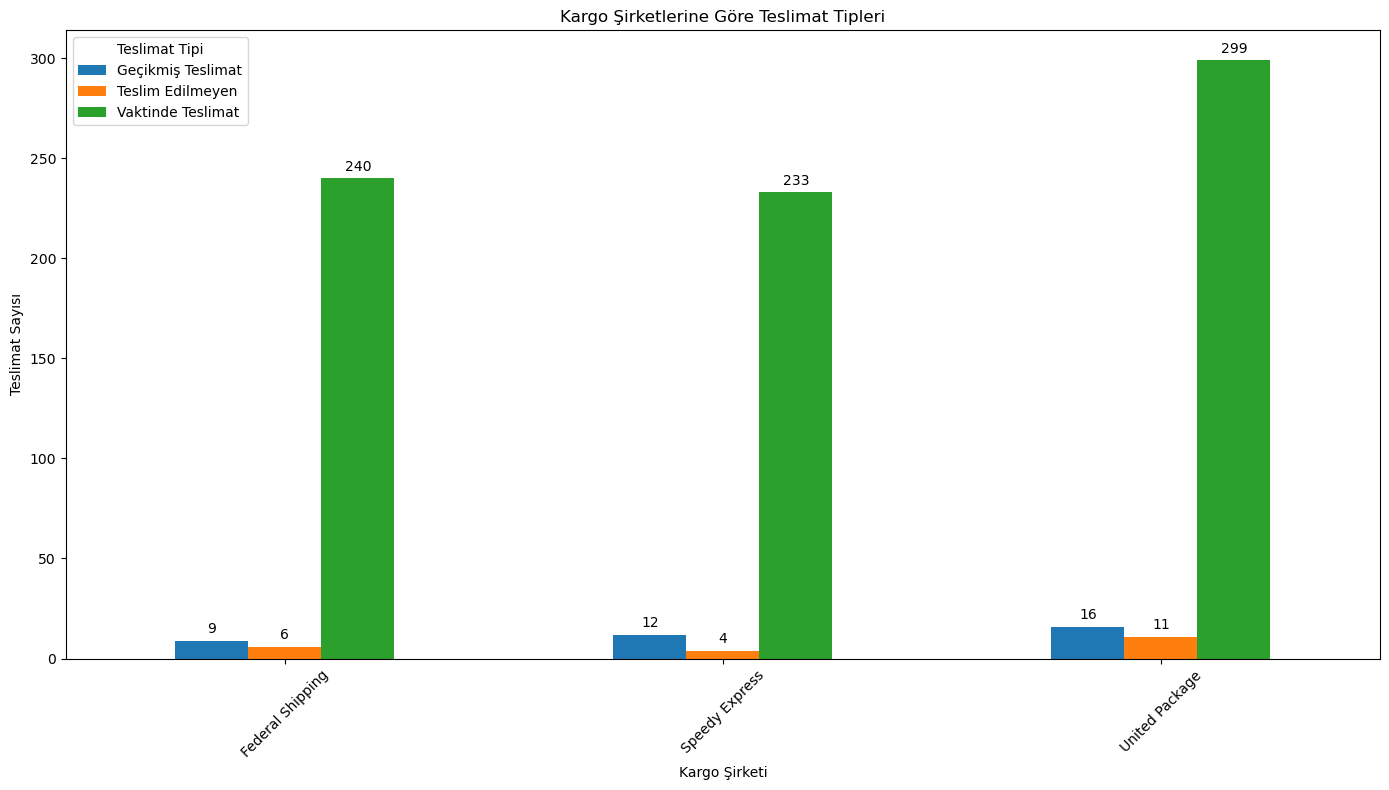

In [55]:
delivery_comparison = df2.groupby(['dagıtım_sirketi', 'teslimattipi']).size().unstack().fillna(0)

# Kümelenmiş çubuk grafik oluşturma
plt.figure(figsize=(6, 4))
ax = delivery_comparison.plot(kind='bar', figsize=(14, 8), ax=plt.gca())

# Veri etiketlerini ekleme
for container in ax.containers:
    # Her çubuk için etiketleri ekleme
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Yüksekliğin biraz üzerine yerleştir
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.title('Kargo Şirketlerine Göre Teslimat Tipleri')
plt.xlabel('Kargo Şirketi')
plt.ylabel('Teslimat Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Teslimat Tipi')
plt.tight_layout()

# Grafiği göster
plt.show()


When we evaluate the Delivery Types, we encounter a table like this.


We are seeing the number of #delayed orders.

In [56]:
sql3 = """select   s.company_name as Dagıtım_Şirketi,product_name,od.quantity as SiparisMik,unit_in_stock as Stok,
unit_on_order as SiparisSay,
reorder_level as StokAltSınır,
discontinued from Products p 
inner join order_details od on p.product_id=od.product_id
inner join orders o on o.order_id=od.order_id
	inner join shippers s on o.ship_via=s.shipper_id
where (Shipped_Date - Order_Date:: date)>(Required_Date - Order_Date :: date)"""

In [59]:
df3 = sqlio.read_sql_query(sql3,conn)

C:\Users\SibelA\AppData\Local\Temp\ipykernel_24720\2304799666.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = sqlio.read_sql_query(sql3,conn)



I wanted to review the stock status of late delivery orders here. 
I saw that there were stock quantities that would cause late delivery.

In [61]:
df3.head(100)

,dagıtım_Şirketi,product_name,siparismik,stok,siparissay,stokaltsınır,discontinued
0,Federal Shipping,Chang,35,17,40,25,1
1,Federal Shipping,Jack's New England Clam Chowder,25,85,0,10,0
2,United Package,Geitost,24,112,0,20,0
3,Speedy Express,Guaraná Fantástica,12,20,0,0,1
4,Speedy Express,Pâté chinois,20,115,0,20,0
...,...,...,...,...,...,...,...
87,Speedy Express,Filo Mix,5,38,0,25,0
88,Speedy Express,Lakkalikööri,20,57,0,20,0
89,Speedy Express,Guaraná Fantástica,10,20,0,0,1
90,Speedy Express,Jack's New England Clam Chowder,24,85,0,10,0


In [66]:
df2.head()

,order_id,order_date,required_date,shipped_date,teslimatulkesi,teslimattipi,teslimatsüresi,teslimattarihinekalangunsayisi,gecikmesüresi,dagıtım_sirketi,dagıtımÜcreti
0,10248,1996-07-04,1996-08-01,1996-07-16,France,Vaktinde Teslimat,12.0,28,0.0,Federal Shipping,32.38
1,10249,1996-07-05,1996-08-16,1996-07-10,Germany,Vaktinde Teslimat,5.0,42,0.0,Speedy Express,11.61
2,10250,1996-07-08,1996-08-05,1996-07-12,Brazil,Vaktinde Teslimat,4.0,28,0.0,United Package,65.83
3,10251,1996-07-08,1996-08-05,1996-07-15,France,Vaktinde Teslimat,7.0,28,0.0,Speedy Express,41.34
4,10252,1996-07-09,1996-08-06,1996-07-11,Belgium,Vaktinde Teslimat,2.0,28,0.0,United Package,51.30


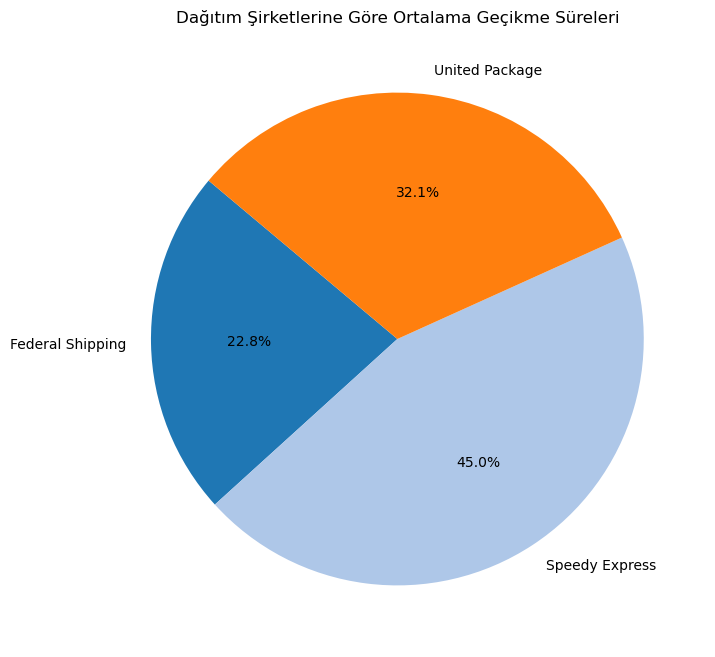

In [69]:
df2['gecikmesüresi'] = df2['gecikmesüresi'].astype(float)
df_filtered = df2.dropna(subset=['gecikmesüresi'])

# Dağıtım şirketlerine göre ortalama geçikme süresini hesaplama
avg_delay_by_company = df_filtered.groupby('dagıtım_sirketi')['gecikmesüresi'].mean()

# Ortalama geçikme sürelerini pasta grafiği olarak gösterme
plt.figure(figsize=(10, 8))
plt.pie(avg_delay_by_company, labels=avg_delay_by_company.index, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('tab20').colors)

# Grafik başlığı
plt.title('Dağıtım Şirketlerine Göre Ortalama Geçikme Süreleri')

# Grafik göster
plt.show()

Speedy Express typically delivers within an average of 8 days. However, the company has a late delivery rate of 45%, indicating inconsistencies in delivery times that may negatively affect customer satisfaction.

Speedy Express stands out as the most cost-effective option in terms of shipping fees. However, this low-cost service comes with noticeable delays.

On the other hand, Federal Shipping demonstrates the best performance in delivery times, ensuring that orders reach customers more quickly and in line with their expectations. However, a lack of data on shipping costs makes it challenging to provide a specific evaluation in this regard.

If customer feedback frequently highlights complaints about late deliveries, this signals the issues Speedy Express faces with its delivery times.

Federal Shipping is a more suitable option for customers looking to minimize late delivery issues. Therefore, working with Federal Shipping could be strategically more advantageous to enhance customer satisfaction and improve delivery times.

In conclusion, considering the company's delivery time challenges and customer feedback, choosing Federal Shipping can be a crucial part of a strategy to increase customer satisfaction and improve delivery times. While Speedy Express has a low-cost advantage, it is essential to address the need for improved delivery times.